In [1]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import os

# Benchmarking the System Performance

In [2]:
run_id = 'BP_2Predictors_live_training_Horizon30'

In [3]:
os.mkdir(run_id)

In [4]:
dir_ = './' + run_id + '/'

This Jupyter notebook serves to benchmark the performance of the prototype system.

### Loading and importing the system

In [2]:
%run ../tools/dataloader.py
%run ../system/activate.py

### Loading and importing financial data to forecast and to benchmark the system on

#### Prophet and Neural prophet training set-up

In [6]:
training_data = DataLoader('BP', '2010-02-01', '2018-02-01')
training_data = training_data.get_adjclose()

In [3]:
predict = DataLoader('BP', '2018-02-02', '2018-05-01')
predict = predict.get_adjclose()

In [4]:
predict_req, real = data_prep(predict, 20, 30) # dividing data into predictor input and real data

### Individual predictor forecasts

In [5]:
individual_predictors_forecasts = individual_predictors_pretrained_BP_30_5(predict_req, 30)

INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 32


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.87E-01
Epoch[150/150]: 100%|█| 150/150 [00:11<00:00, 13.02it/s, SmoothL1Loss=0.00507, MAE=1.49, RegLoss=0, MAE_val=12.1, Smoot


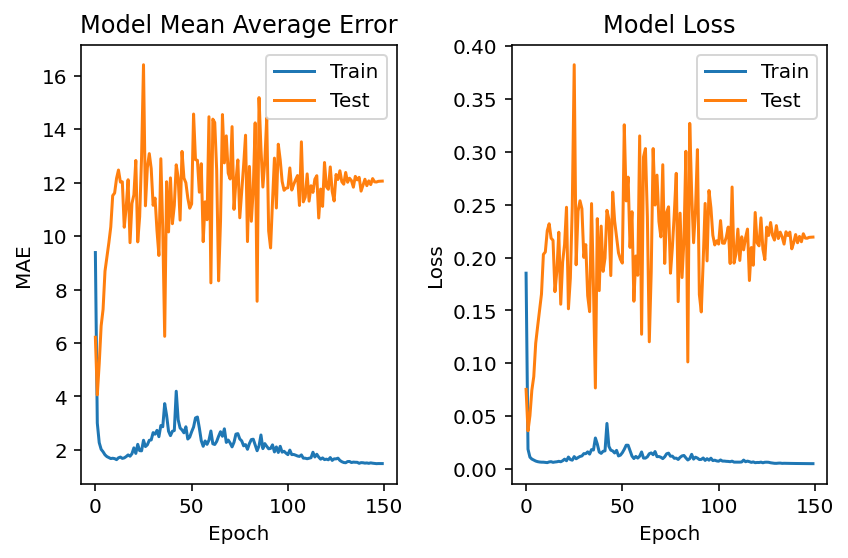

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 86 forecasts with cutoffs between 2014-07-07 00:00:00 and 2018-01-02 00:00:00


  0%|          | 0/86 [00:00<?, ?it/s]

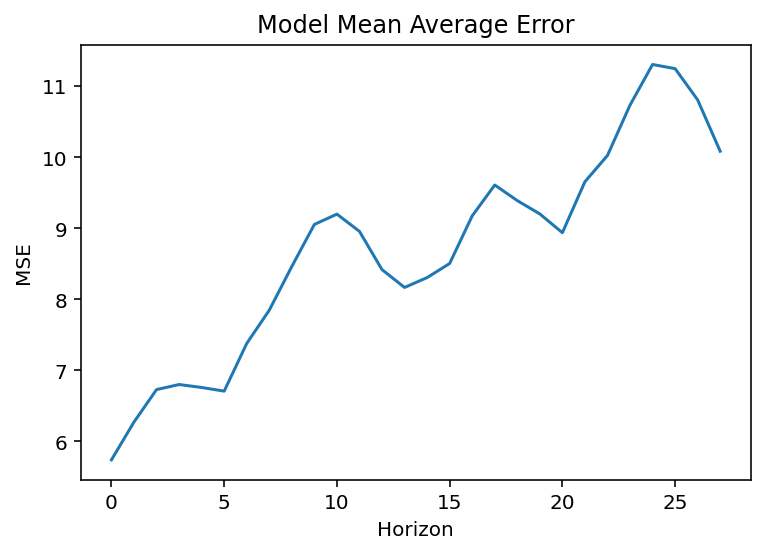

In [10]:
#individual_predictors_forecasts = individual_predictors_template2(training_data, 30)

### System disagreement between individual predictor forecasts

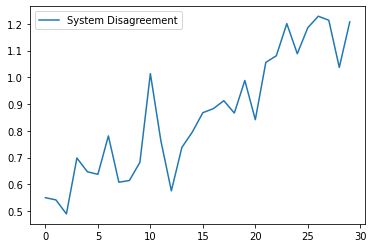

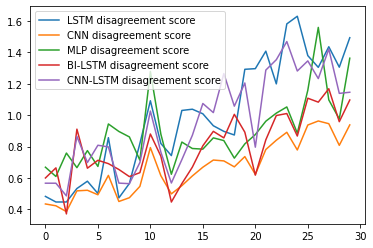

In [6]:
system_disagreement(individual_predictors_forecasts)

### Building consensus forecast values

In [7]:
consensus_forecasts = consensus(individual_predictors_forecasts, real)

In [8]:
all_forecasts = combined_frame(individual_predictors_forecasts, consensus_forecasts, real)

In [9]:
summary = all_stats_frame(all_forecasts, individual_predictors_forecasts) # combining individual predictor forecasts, consensus forecasts and disagreement scores
summary

,Average,NoMemory,Memory,Focus,Anchor,Correcting,Correcting Memory,Real Value,LSTM,CNN,MLP,BI-LSTM,CNN-LSTM,System Disagreement,LSTM disagreement score,CNN disagreement score,MLP disagreement score,BI-LSTM disagreement score,CNN-LSTM disagreement score
Date,,,,,,,,,,,,,,,,,,,
2018-03-05,31.923475,31.923475,31.923475,31.923475,32.386080,31.923475,31.923475,31.924553,31.519371,31.760506,32.591705,31.323856,32.421936,0.550122,0.482310,0.434083,0.668230,0.599619,0.566369
2018-03-06,31.938124,31.924954,31.931539,31.757072,31.936986,31.939325,31.938725,32.242489,31.636442,31.757072,32.547344,31.274017,32.475746,0.541753,0.446652,0.422526,0.609220,0.664107,0.566261
2018-03-07,31.866467,31.904802,31.870079,32.170414,31.941042,32.171566,31.968918,32.046844,31.419725,31.521929,32.624828,31.595438,32.170414,0.489391,0.446741,0.385419,0.758361,0.370718,0.485713
2018-03-08,31.893625,31.924047,31.917750,32.758286,32.021879,32.073829,32.014092,32.169121,31.613255,31.687441,32.426117,30.983028,32.758286,0.698140,0.532461,0.517624,0.665359,0.910597,0.864660
2018-03-09,31.704929,31.754561,31.728842,32.478863,31.707402,31.980077,31.855592,32.332169,31.181055,31.469465,32.478863,31.042992,32.352268,0.646873,0.579099,0.521417,0.773934,0.661937,0.697977
2018-03-12,31.807995,31.916507,31.847105,32.616154,31.940875,32.437798,32.039121,32.487061,31.448248,31.488953,32.391087,31.095535,32.616154,0.637452,0.500832,0.492691,0.673118,0.712460,0.808158
2018-03-13,31.519629,31.637523,31.572197,32.463337,31.706802,32.191348,31.810648,32.242489,30.663185,31.312935,32.463337,30.939068,32.219620,0.780937,0.856444,0.616141,0.943708,0.690914,0.797478
2018-03-14,31.579863,31.667592,31.626876,31.927399,31.676795,32.308544,31.927919,31.688131,31.227610,31.342339,32.475788,30.926178,31.927399,0.607841,0.472826,0.449880,0.895926,0.653685,0.566892
2018-03-15,31.450956,31.448347,31.493605,31.815842,31.464976,31.558912,31.771015,31.818569,30.915678,31.368473,32.312157,30.842632,31.815842,0.614274,0.564497,0.473938,0.861200,0.608324,0.563411


In [10]:
summary.to_csv(dir_ + run_id + '_Forecast_Summary.csv')

NameError: name 'dir_' is not defined

### Absolute error analysis of individual predictors and consensus forecasts

In [14]:
prediction_error = absolute_error_analytics(individual_predictors_forecasts, consensus_forecasts, real)
prediction_error

,LSTM absolute error,CNN absolute error,MLP absolute error,BI-LSTM absolute error,CNN-LSTM absolute error,Average absolute error,NoMemory absolute error,Memory absolute error,Focus absolute error,Anchor absolute error,Correcting absolute error,Correcting Memory absolute error,LSTM disagreement score,CNN disagreement score,MLP disagreement score,BI-LSTM disagreement score,CNN-LSTM disagreement score,System Disagreement
Date,,,,,,,,,,,,,,,,,,
2018-03-05,0.405182,0.164047,0.667152,0.600697,0.497383,0.001078,0.001078,0.001078,0.001078,0.461527,0.001078,0.001078,0.482310,0.434083,0.668230,0.599619,0.566369,0.550122
2018-03-06,0.606047,0.485416,0.304855,0.968472,0.233257,0.304364,0.317535,0.310950,0.485416,0.305503,0.303164,0.303764,0.446652,0.422526,0.609220,0.664107,0.566261,0.541753
2018-03-07,0.627119,0.524916,0.577984,0.451406,0.123569,0.180378,0.142042,0.176766,0.123569,0.105802,0.124722,0.077927,0.446741,0.385419,0.758361,0.370718,0.485713,0.489391
2018-03-08,0.555866,0.481680,0.256996,1.186092,0.589165,0.275496,0.245074,0.251370,0.589165,0.147242,0.095292,0.155028,0.532461,0.517624,0.665359,0.910597,0.864660,0.698140
2018-03-09,1.151114,0.862703,0.146694,1.289177,0.020100,0.627240,0.577607,0.603327,0.146694,0.624767,0.352091,0.476576,0.579099,0.521417,0.773934,0.661937,0.697977,0.646873
2018-03-12,1.038813,0.998108,0.095974,1.391525,0.129093,0.679065,0.570553,0.639956,0.129093,0.546186,0.049263,0.447939,0.500832,0.492691,0.673118,0.712460,0.808158,0.637452
2018-03-13,1.579304,0.929554,0.220848,1.303421,0.022869,0.722860,0.604965,0.670292,0.220848,0.535686,0.051141,0.431840,0.856444,0.616141,0.943708,0.690914,0.797478,0.780937
2018-03-14,0.460522,0.345793,0.787657,0.761953,0.239267,0.108269,0.020539,0.061255,0.239267,0.011336,0.620413,0.239788,0.472826,0.449880,0.895926,0.653685,0.566892,0.607841
2018-03-15,0.902891,0.450096,0.493587,0.975937,0.002728,0.367613,0.370223,0.324964,0.002728,0.353593,0.259657,0.047554,0.564497,0.473938,0.861200,0.608324,0.563411,0.614274


In [15]:
prediction_error.to_csv(dir_ + run_id + '_Prediction_Errors.csv')

NameError: name 'dir_' is not defined

### Correlation matrix of individual predictor and consensus forecast absolute errors

,LSTM absolute error,CNN absolute error,MLP absolute error,BI-LSTM absolute error,CNN-LSTM absolute error,Average absolute error,NoMemory absolute error,Memory absolute error,Focus absolute error,Anchor absolute error,Correcting absolute error,Correcting Memory absolute error,LSTM disagreement score,CNN disagreement score,MLP disagreement score,BI-LSTM disagreement score,CNN-LSTM disagreement score,System Disagreement
LSTM absolute error,1.000000,0.986546,0.942621,0.976250,0.936080,0.992264,0.991802,0.991141,0.936052,0.982435,0.022540,0.981353,0.890949,0.900468,0.662237,0.764497,0.826366,0.901757
CNN absolute error,0.986546,1.000000,0.945150,0.984096,0.960660,0.996181,0.996198,0.996528,0.953444,0.989250,-0.009799,0.991348,0.816564,0.863372,0.665693,0.749178,0.776664,0.857036
MLP absolute error,0.942621,0.945150,1.000000,0.947023,0.961911,0.949725,0.953967,0.950207,0.957350,0.954191,0.018853,0.959329,0.793374,0.845573,0.669340,0.768156,0.771782,0.849600
BI-LSTM absolute error,0.976250,0.984096,0.947023,1.000000,0.948429,0.990890,0.991013,0.990596,0.943222,0.984531,0.011809,0.986858,0.794551,0.888447,0.659049,0.838447,0.821017,0.879721
CNN-LSTM absolute error,0.936080,0.960660,0.961911,0.948429,1.000000,0.952606,0.957339,0.954455,0.984279,0.958603,-0.047630,0.955455,0.757337,0.827759,0.710140,0.751168,0.695104,0.820016
Average absolute error,0.992264,0.996181,0.949725,0.990890,0.952606,1.000000,0.999650,0.999919,0.946220,0.993336,0.011479,0.992708,0.829347,0.870172,0.639577,0.770873,0.796508,0.866211
NoMemory absolute error,0.991802,0.996198,0.953967,0.991013,0.957339,0.999650,1.000000,0.999698,0.951196,0.993740,0.004591,0.992561,0.828724,0.871760,0.646864,0.772953,0.793984,0.867350
Memory absolute error,0.991141,0.996528,0.950207,0.990596,0.954455,0.999919,0.999698,1.000000,0.947432,0.993742,0.007241,0.992861,0.824625,0.865739,0.637077,0.767541,0.790973,0.861502
Focus absolute error,0.936052,0.953444,0.957350,0.943222,0.984279,0.946220,0.951196,0.947432,1.000000,0.949436,0.002051,0.952543,0.779846,0.851470,0.728670,0.764883,0.719931,0.843334
Anchor absolute error,0.982435,0.989250,0.954191,0.984531,0.958603,0.993336,0.993740,0.993742,0.949436,1.000000,0.037634,0.992561,0.806937,0.853088,0.620464,0.756845,0.770624,0.843483


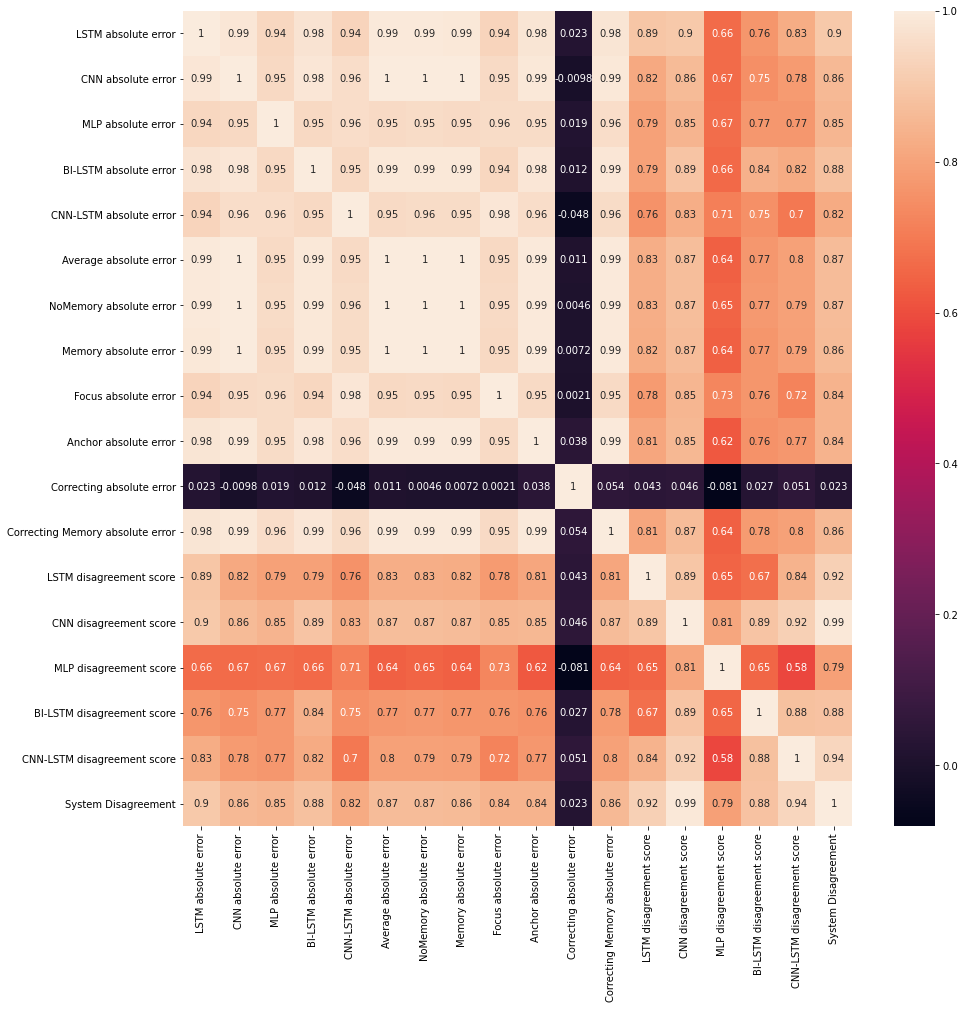

In [16]:
correlation_ = correlation(prediction_error, True)
correlation_

In [17]:
correlation_.to_csv(dir_ + run_id + '_Error_Correlation.csv')

NameError: name 'dir_' is not defined

### MSE,  MSE log and MAE scores

,Algorithms,MSE
0,Average,5.736552
1,NoMemory,5.477071
2,Memory,5.416116
3,Focus,2.886259
4,Anchor,3.983440
5,Correcting,0.285209
6,Correcting Memory,2.750885
7,LSTM,11.273420
8,CNN,5.967228
9,MLP,3.259404


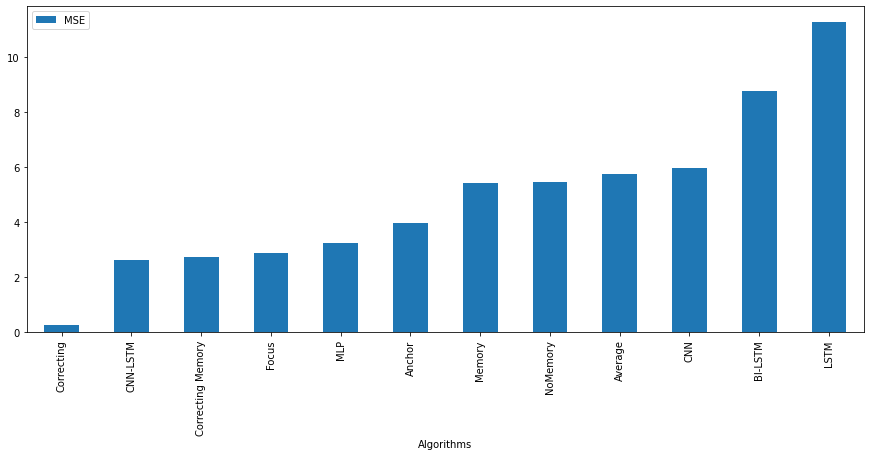

In [18]:
mse = mse_score(all_forecasts, True)
mse

In [21]:
mse.to_csv(dir_ + run_id + '_MSE_score.csv')

,Algorithms,MSE Log
0,Average,0.005129
1,NoMemory,0.004883
2,Memory,0.004826
3,Focus,0.002491
4,Anchor,0.003494
5,Correcting,0.000252
6,Correcting Memory,0.002373
7,LSTM,0.010552
8,CNN,0.005346
9,MLP,0.002833


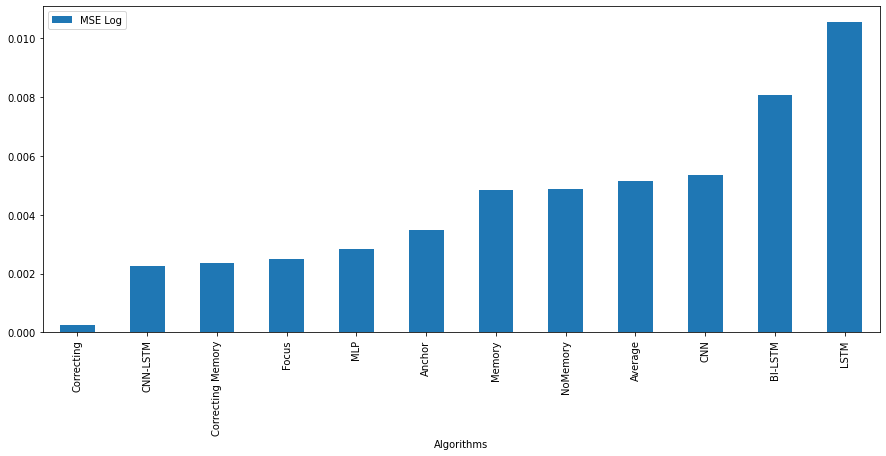

In [19]:
mse_log = mse_log_score(all_forecasts, True)
mse_log

In [23]:
mse_log.to_csv(dir_ + run_id + '_MSE_log_score.csv')

,Algorithms,MAE
0,Average,1.799415
1,NoMemory,1.735630
2,Memory,1.732969
3,Focus,1.199631
4,Anchor,1.516170
5,Correcting,0.411296
6,Correcting Memory,1.224634
7,LSTM,2.750965
8,CNN,1.912448
9,MLP,1.352358


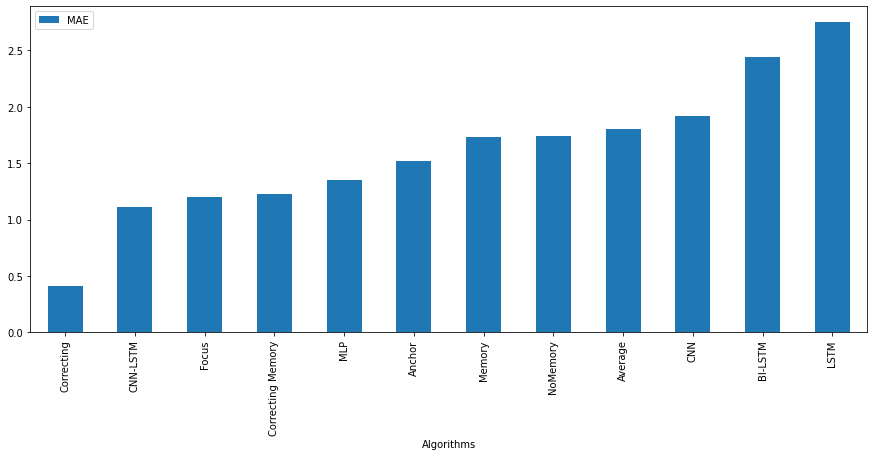

In [20]:
mae = mae_score(all_forecasts, True)
mae

In [25]:
mae.to_csv(dir_ + run_id + '_MAE_score.csv')

### Performance plotting of all forecasting algorithms

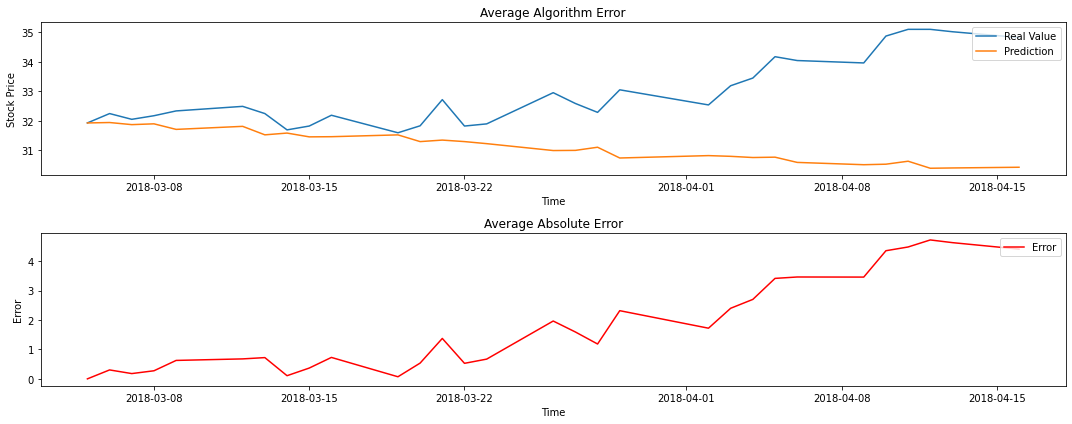

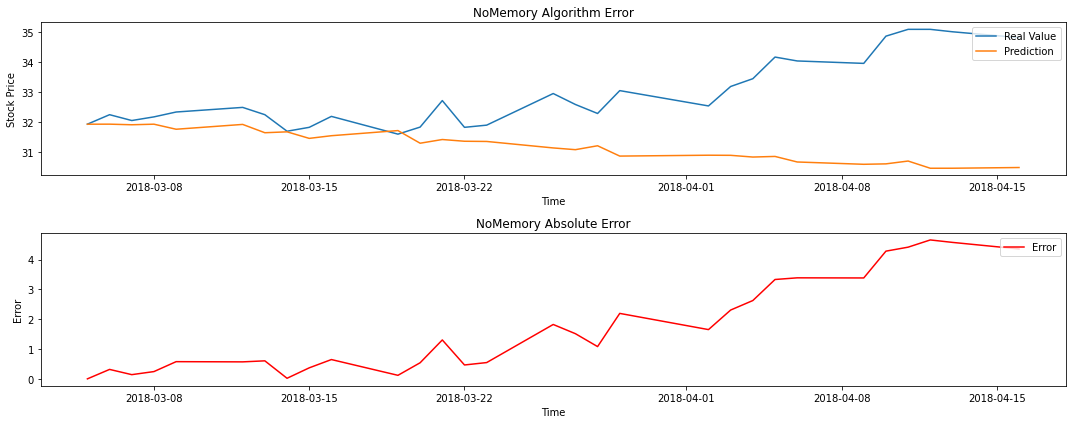

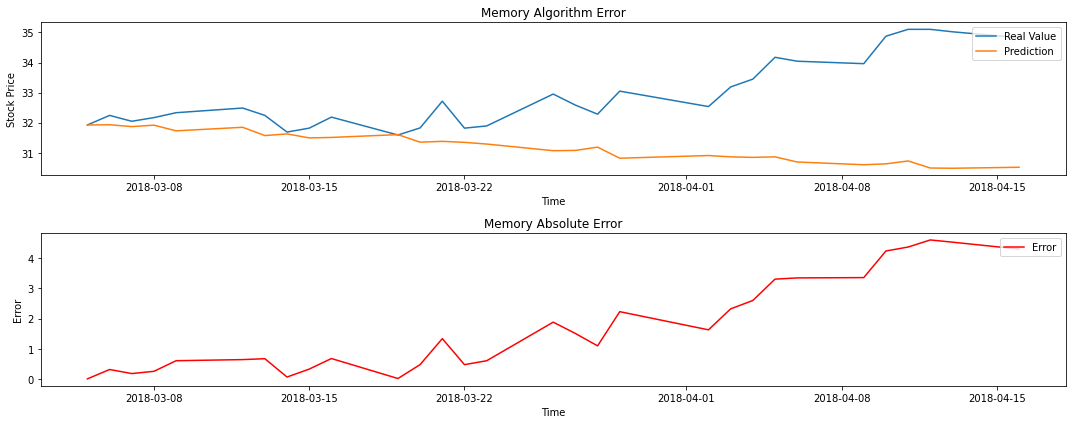

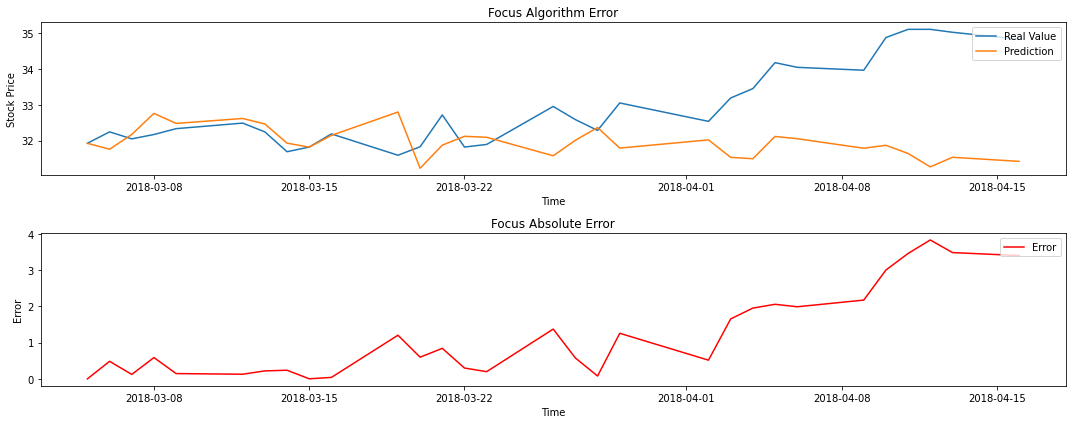

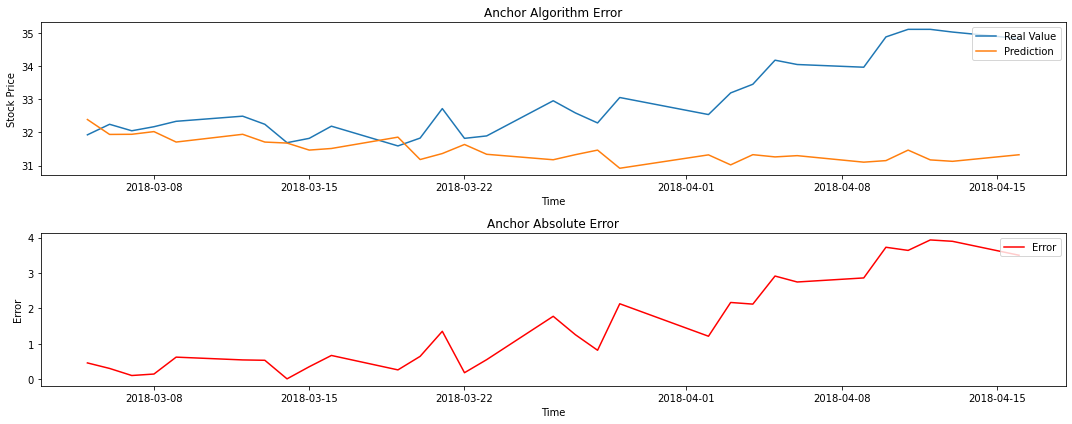

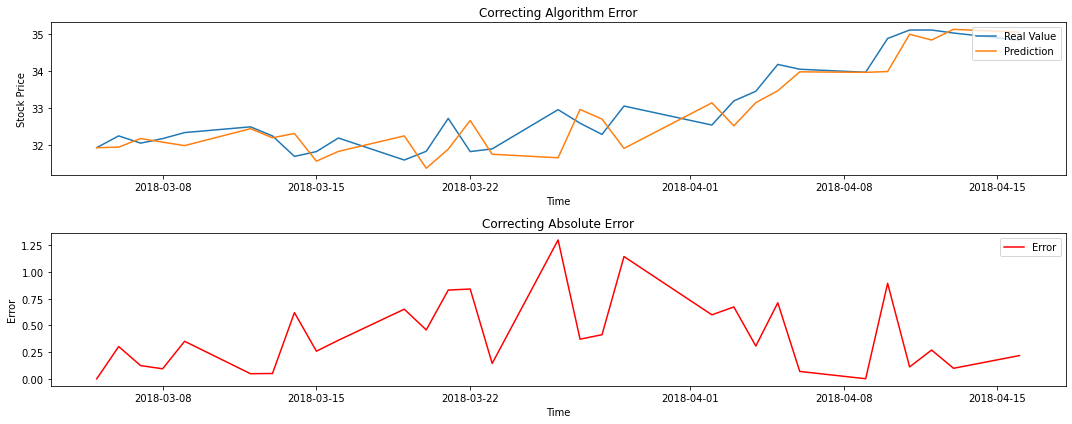

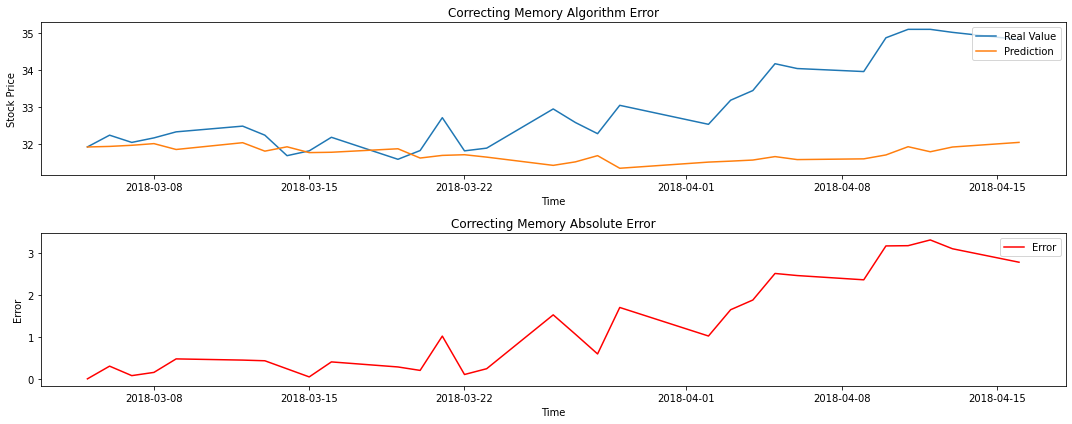

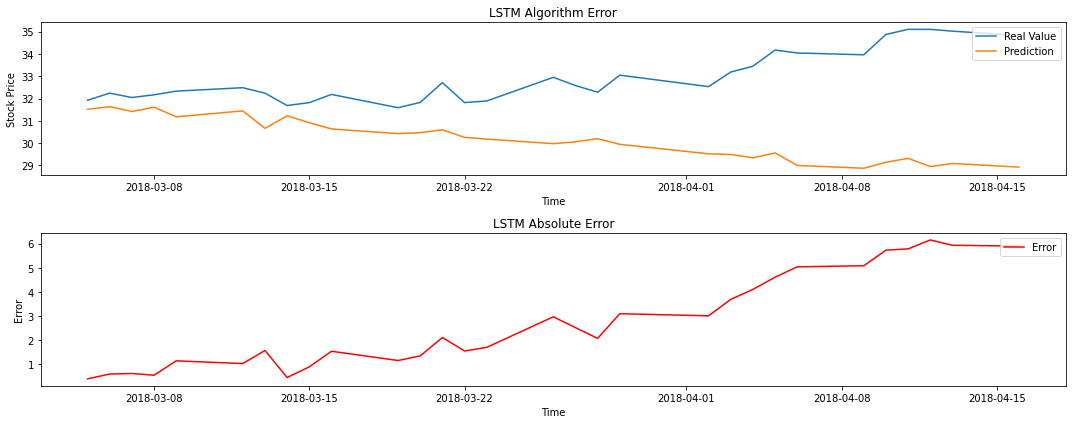

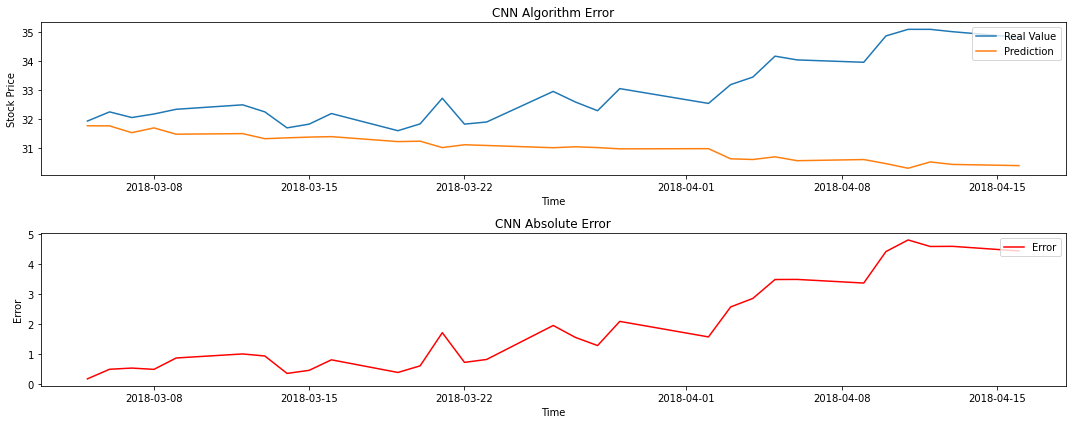

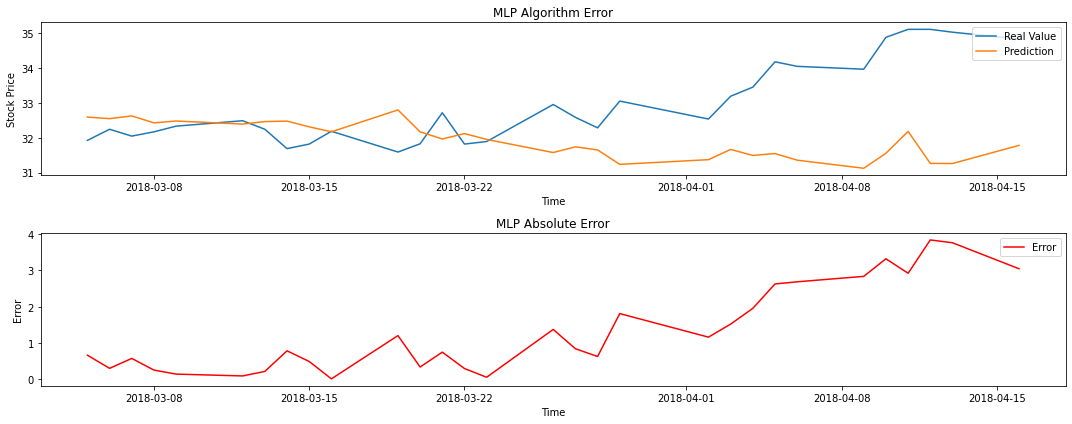

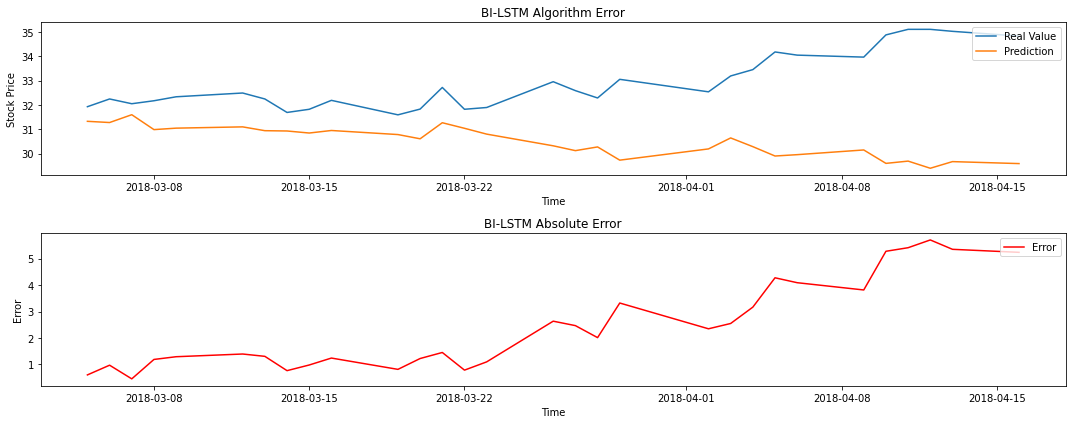

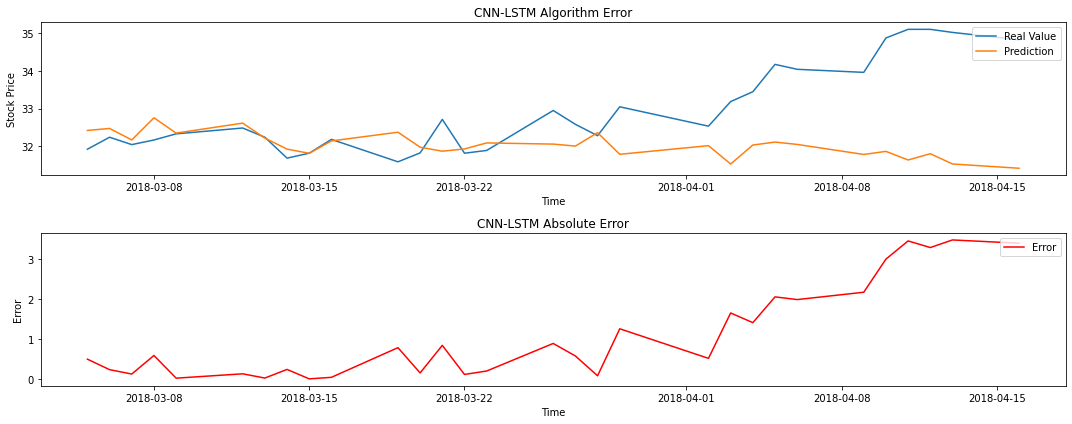

In [21]:
plot_performance(all_forecasts)